# Store Sales Time Series Forecasting Dataset (Implementing Various Models and Artifical Neural Networks) for Sales Prediction

## Importing Libraries

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

## Loading Dataset

In [2]:
file_id = "1lHOFZRtyBLjegcvKhe6i0VwNUbE_2yGO"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

df = pd.read_parquet(download_url)

## Expolaratory Data Analysis

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1.0,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,1.0,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,1.0,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,1.0,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,1.0,1,1,2013


In [4]:
df.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
isHoliday,0
day_of_week,0
month,0
year,0


In [5]:
df.shape

(3013362, 10)

In [6]:
len(df['store_nbr'].unique())

54

In [7]:
df['family'].value_counts()

,count
family,
AUTOMOTIVE,91314
BABY CARE,91314
BEAUTY,91314
BEVERAGES,91314
BOOKS,91314
BREAD/BAKERY,91314
CELEBRATION,91314
CLEANING,91314
DAIRY,91314


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.corr(numeric_only=True)['isHoliday']

,isHoliday
id,2.696594e-02
store_nbr,-7.664317e-16
sales,8.046486e-03
onpromotion,9.984562e-03
isHoliday,1.000000e+00
day_of_week,-2.153067e-02
month,1.481209e-01
year,-2.876382e-03


In [10]:
df = df[df['sales']!=0].copy()

In [11]:
df.shape

(2070879, 10)

In [12]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'isHoliday', 'day_of_week', 'month', 'year'],
      dtype='object')

In [13]:
df.dtypes

,0
id,int64
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64
isHoliday,float64
day_of_week,int64
month,int64
year,int64


In [14]:
df.corr(numeric_only=True)['sales']

,sales
id,0.031280
store_nbr,0.061615
sales,1.000000
onpromotion,0.410243
isHoliday,0.010594
day_of_week,0.045537
month,0.012181
year,0.028440


In [15]:
df.drop(columns=['id'],inplace=True)

In [16]:
df.head()

,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week,month,year
563,2013-01-01,25,BEAUTY,2.000,0,1.0,1,1,2013
564,2013-01-01,25,BEVERAGES,810.000,0,1.0,1,1,2013
566,2013-01-01,25,BREAD/BAKERY,180.589,0,1.0,1,1,2013
568,2013-01-01,25,CLEANING,186.000,0,1.0,1,1,2013
569,2013-01-01,25,DAIRY,143.000,0,1.0,1,1,2013


In [17]:
df.dtypes

,0
date,object
store_nbr,int64
family,object
sales,float64
onpromotion,int64
isHoliday,float64
day_of_week,int64
month,int64
year,int64


In [18]:
df = pd.get_dummies(df, columns=['day_of_week','month','year'],dtype=int)

In [19]:
df.head()

,date,store_nbr,family,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,month_8,month_9,month_10,month_11,month_12,year_2013,year_2014,year_2015,year_2016,year_2017
563,2013-01-01,25,BEAUTY,2.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
564,2013-01-01,25,BEVERAGES,810.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
566,2013-01-01,25,BREAD/BAKERY,180.589,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
568,2013-01-01,25,CLEANING,186.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
569,2013-01-01,25,DAIRY,143.000,0,1.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
df['store_nbr'].unique()

array([25,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 23, 24, 26, 27,
       28,  3, 30, 31, 32, 33, 34, 35, 37, 38, 39,  4, 40, 41, 43, 44, 45,
       46, 47, 48, 49,  5, 50, 51, 54,  6,  7,  8,  9, 36, 53, 20, 29, 21,
       42, 22, 52])

In [21]:
len(df['family'].unique())

33

In [22]:
df = pd.get_dummies(df, columns=['store_nbr'],prefix='store',dtype=int)

In [23]:
df = pd.get_dummies(df, columns=['family'],prefix='family',dtype=int)

In [24]:
df.head()

,date,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
563,2013-01-01,2.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,2013-01-01,810.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,2013-01-01,180.589,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,2013-01-01,186.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,2013-01-01,143.000,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.drop(columns=['date'],inplace=True)

In [26]:
for i in df.columns:
    print(f"{i} max = {df[str(i)].max()}")
    print(f"{i} min = {df[str(i)].min()}")

sales max = 124717.0
sales min = 0.122
onpromotion max = 741
onpromotion min = 0
isHoliday max = 1.0
isHoliday min = 0.0
day_of_week_0 max = 1
day_of_week_0 min = 0
day_of_week_1 max = 1
day_of_week_1 min = 0
day_of_week_2 max = 1
day_of_week_2 min = 0
day_of_week_3 max = 1
day_of_week_3 min = 0
day_of_week_4 max = 1
day_of_week_4 min = 0
day_of_week_5 max = 1
day_of_week_5 min = 0
day_of_week_6 max = 1
day_of_week_6 min = 0
month_1 max = 1
month_1 min = 0
month_2 max = 1
month_2 min = 0
month_3 max = 1
month_3 min = 0
month_4 max = 1
month_4 min = 0
month_5 max = 1
month_5 min = 0
month_6 max = 1
month_6 min = 0
month_7 max = 1
month_7 min = 0
month_8 max = 1
month_8 min = 0
month_9 max = 1
month_9 min = 0
month_10 max = 1
month_10 min = 0
month_11 max = 1
month_11 min = 0
month_12 max = 1
month_12 min = 0
year_2013 max = 1
year_2013 min = 0
year_2014 max = 1
year_2014 min = 0
year_2015 max = 1
year_2015 min = 0
year_2016 max = 1
year_2016 min = 0
year_2017 max = 1
year_2017 min = 0
s

In [27]:
df['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [28]:
scaler = StandardScaler()
df['onpromotion'] = scaler.fit_transform(df[['onpromotion']])

In [29]:
df.head()

,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
563,2.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,810.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,180.589,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,186.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,143.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df['onpromotion'].max()

50.39708028138322

In [31]:
df['onpromotion'].min()

-0.2594977105361316

In [32]:
df

,sales,onpromotion,isHoliday,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
563,2.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
564,810.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,180.589,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
568,186.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
569,143.000,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013357,438.133,-0.259498,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3013358,154.553,-0.191135,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3013359,2419.729,9.858145,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3013360,121.000,0.287402,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df['sales'].max()

124717.0

In [34]:
df['sales'].min()

0.122

In [35]:
df['sales'].mean()

np.float64(521.1621470152788)

## Splitting data in train test

In [36]:
X = df.drop(columns=['sales'])
y = df['sales']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1656703, 113), (414176, 113), (1656703,), (414176,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1325362, 113), (331341, 113), (1325362,), (331341,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1060289, 113), (265073, 113), (1060289,), (265073,))

## Model Building, Training and Evaluation

In [43]:
models = {
    'LinearRegression':LinearRegression(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()
}


In [44]:
mae_train = {}
mae_test = {}

In [45]:
models['LinearRegression'].fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred_train = models['LinearRegression'].predict(X_train)

In [47]:
mean_absolute_error(y_train,y_pred_train)

366.02609404351955

In [48]:
y_pred_test = models['LinearRegression'].predict(X_test)

In [49]:
mean_absolute_error(y_test,y_pred_test)

366.86209973500604

In [50]:
mae_train['LinearRegression'] = mean_absolute_error(y_train,y_pred_train)
mae_test['LinearRegression'] = mean_absolute_error(y_test,y_pred_test)

In [51]:
models['XGBRegressor'] = XGBRegressor()

In [52]:
models['XGBRegressor'].fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_pred_test = models['XGBRegressor'].predict(X_test)
y_pred_train = models['XGBRegressor'].predict(X_train)
mae_train['XGBRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test['XGBRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [54]:
mae_train

{'LinearRegression': 366.02609404351955, 'XGBRegressor': 143.06729318976235}

In [55]:
mae_test

{'LinearRegression': 366.86209973500604, 'XGBRegressor': 145.3291403188377}

In [ ]:
model = RandomForestRegressor(
    n_estimators=25, 
    max_depth=15,        # Prevents trees from becoming infinitely deep
    max_samples=0.5,     # Trains each tree on only 150k rows instead of all 300k
    n_jobs=-1            # Uses all available Colab CPU cores
)
model.fit(X_train,y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
mae_train['RandomForestRegressor'] = mean_absolute_error(y_train,y_pred_train)
mae_test['RandomForestRegressor'] = mean_absolute_error(y_test,y_pred_test)

In [57]:
# Convert your result dictionaries to a DataFrame
results = pd.DataFrame({
    'Model': list(mae_test.keys()),
    'Train MAE': list(mae_train.values()),
    'Test MAE': list(mae_test.values())
})

# Melt the data for Seaborn (converts it from wide to long format)
results_melted = results.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

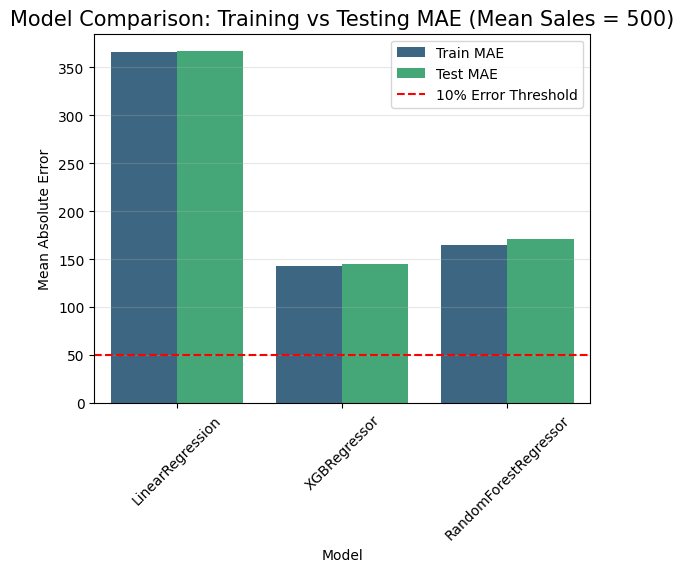

In [58]:

sns.barplot(data=results_melted, x='Model', y='MAE', hue='Dataset', palette='viridis')

# Add a reference line for your mean (500)
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')

plt.title('Model Comparison: Training vs Testing MAE (Mean Sales = 500)', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [59]:
mae_train

{'LinearRegression': 366.02609404351955,
 'XGBRegressor': 143.06729318976235,
 'RandomForestRegressor': 164.916689189293}

In [60]:
mae_test

{'LinearRegression': 366.86209973500604,
 'XGBRegressor': 145.3291403188377,
 'RandomForestRegressor': 170.8950660922719}

## Neural Network

In [61]:
X_train.shape

(1060289, 113)

In [62]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(113,)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(32,activation='relu'),
        keras.layers.Dense(1,activation='linear'),
    ]
)

In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,961 (97.50 KB)

 Trainable params: 24,961 (97.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(
    loss=keras.losses.MeanAbsoluteError(),
    optimizer=keras.optimizers.Adam()
)

In [65]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs=5,
    batch_size=512,
)

Epoch 1/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - loss: 266.3450 - val_loss: 104.7601
Epoch 2/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 99.1242 - val_loss: 87.7335
Epoch 3/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 85.4484 - val_loss: 81.6645
Epoch 4/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 79.2917 - val_loss: 78.6991
Epoch 5/5
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 77.4019 - val_loss: 77.5599


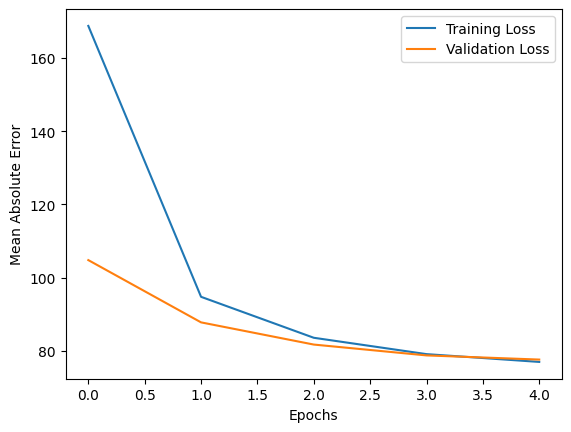

In [66]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [67]:
# 1. Predict
y_pred = model.predict(X_test)

# 2. Evaluate (This returns the loss and any metrics you defined)
results = model.evaluate(X_test, y_test)
print(f"Final Test MAE: {results}")

8284/8284 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 77.1813
Final Test MAE: 77.55990600585938


In [68]:
# 1. Predict
y_pred = model.predict(X_test)

# 2. Evaluate (This returns the loss and any metrics you defined)
results = model.evaluate(X_test, y_test)
print(f"Final Test MAE: {results}")

8284/8284 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 77.1813
Final Test MAE: 77.55990600585938


In [69]:
mean_absolute_error(y_test,y_pred)

77.5598607269493

In [70]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
mae_train['ANN'] = mean_absolute_error(y_train,y_pred_train)
mae_test['ANN'] = mean_absolute_error(y_test,y_pred_test)

33135/33135 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step
8284/8284 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


In [71]:
mae_train

{'LinearRegression': 366.02609404351955,
 'XGBRegressor': 143.06729318976235,
 'RandomForestRegressor': 164.916689189293,
 'ANN': 75.42857485473722}

In [72]:
mae_test

{'LinearRegression': 366.86209973500604,
 'XGBRegressor': 145.3291403188377,
 'RandomForestRegressor': 170.8950660922719,
 'ANN': 77.5598607269493}

In [73]:
mae_df = pd.DataFrame({
    'Model': list(mae_test.keys()),
    'Test MAE': list(mae_test.values()),
    'Train MAE': list(mae_train.values())
})

In [75]:
results_melted = mae_df.melt(id_vars='Model', var_name='Dataset', value_name='MAE')

In [76]:
results_melted

,Model,Dataset,MAE
0,LinearRegression,Test MAE,366.862100
1,XGBRegressor,Test MAE,145.329140
2,RandomForestRegressor,Test MAE,170.895066
3,ANN,Test MAE,77.559861
4,LinearRegression,Train MAE,366.026094
5,XGBRegressor,Train MAE,143.067293
6,RandomForestRegressor,Train MAE,164.916689
7,ANN,Train MAE,75.428575


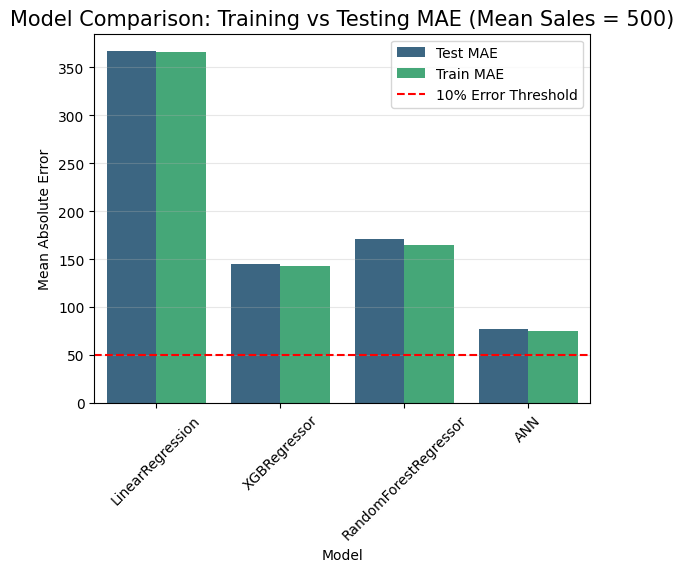

In [77]:
sns.barplot(data=results_melted, x='Model', y='MAE', hue='Dataset', palette='viridis')
plt.axhline(500 * 0.1, color='red', linestyle='--', label='10% Error Threshold')
plt.title('Model Comparison: Training vs Testing MAE (Mean Sales = 500)', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Hyperparameters Tuning

### ML Models

### Neural Networks